In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [11]:
df = pd.read_csv('listings_prepar.csv', sep=',')
df=df.dropna()
df

,number_of_reviews,calculated_host_listings_count,availability_365,datetime_diff,room_type=0,room_type=1,room_type=2,room_type=3,price
0,65.0,1.0,53.0,831.0,0.0,0.0,1.0,0.0,70.0
1,33.0,2.0,48.0,1247.0,0.0,0.0,1.0,0.0,17.0
2,64.0,1.0,301.0,890.0,1.0,0.0,0.0,0.0,115.0
3,8.0,1.0,0.0,1658.0,0.0,0.0,1.0,0.0,54.0
4,38.0,3.0,337.0,890.0,1.0,0.0,0.0,0.0,90.0
...,...,...,...,...,...,...,...,...,...
3839,19.0,2.0,144.0,889.0,0.0,0.0,1.0,0.0,169.0
3840,40.0,8.0,317.0,922.0,0.0,0.0,0.0,1.0,149.0
3841,14.0,1.0,267.0,879.0,1.0,0.0,0.0,0.0,80.0
3842,73.0,2.0,51.0,822.0,1.0,0.0,0.0,0.0,180.0


In [12]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 8].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
#применяем медод рекурсивного исключения признаков, где модель обучается по очереди уменьшая кол-во регрессоров
#эксперты говорят, что метод рекурсивного исключения для случайного леса может даже быть более эффективным
from sklearn.feature_selection import RFE

names = ['number_of_reviews', 'calculated_host_listings_count', 
         'availability_365', 'datetime_diff', 'room_type=0', 'room_type=1', 'room_type=2', 'room_type=3', 'price']
array = df.values
X = array[:,0:8]
Y = array[:,8]
model = LogisticRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X, Y)

C:\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the da

In [14]:
fit.n_features_
fit.support_
fit.ranking_

# Лучшим признаком стал number_of_reviews, вторым aviability_365 и третьим datetime_diff

array([1, 4, 2, 3, 5, 8, 6, 7])

In [15]:
#для модели количество обзоров рекомендуют как наилучший параметр, им и воспользуемся
from sklearn.tree import DecisionTreeRegressor
sdt = DecisionTreeRegressor(max_leaf_nodes = 10).fit(X_train[:, 0:1], y_train)

In [16]:
y_pred = sdt.predict(X_test[:, 0:1])

In [17]:
#стандартные показатели увы, не очень. Модель явно не понимает, что происходит
sdt.score(X_train[:, 0:1], y_train), sdt.score(X_test[:, 2:3], y_test)

(0.01986070754530067, -0.00886482384726861)

In [18]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sdt.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(1378.3703702786092, 1283.505058129788)

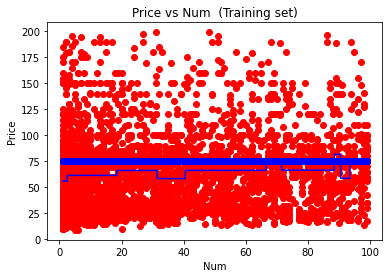

In [19]:
X_grid = np.arange(min(X[:, 0:1]), max(X[:, 0:1]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

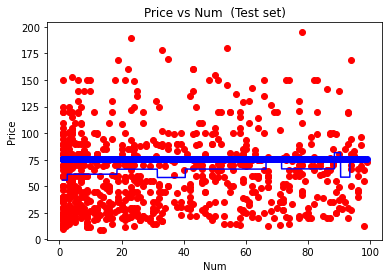

In [20]:
X_grid = np.arange(min(X[:, 0:1]), max(X[:, 0:1]), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color = 'blue')
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [ ]:
#посмотрим на модель дерева регрессии

In [21]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor().fit(X_train, y_train)

In [22]:
y_pred = dt.predict(X_test)

In [23]:
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.9960758096772253, -0.7417899513533497)

In [ ]:
#видим, что модель по базовым показателям уже справляется лучше, но посмотрим стандартную ошибку

In [24]:
#тем не менее, модель переобучается, так как ошибка достаточно высокая
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(5.5185907859078585, 2233.655721716515)

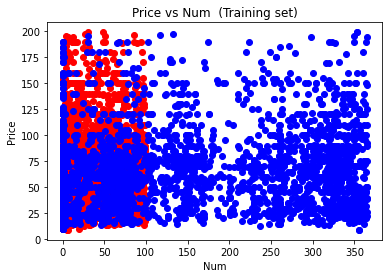

In [25]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,2], dt.predict(X_train), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

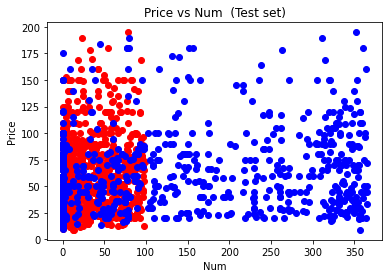

In [26]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,2], dt.predict(X_test), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 10, random_state = 0).fit(X_train, y_train)

In [28]:
y_pred = rf.predict(X_test)

In [29]:
#видим, что случайный лес справляется даже хуже - возможно, дело в особенности выбора данных в этой задаче
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.799084771509439, -0.12111572689669825)

In [30]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(282.54718489611565, 1437.7086950946396)

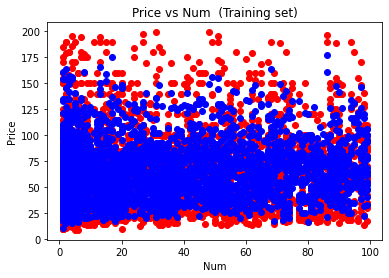

In [31]:
plt.scatter(X_train[:,0], y_train, color = 'red')
plt.plot(X_train[:,0], rf.predict(X_train), 'bo')
plt.title('Price vs Num  (Training set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

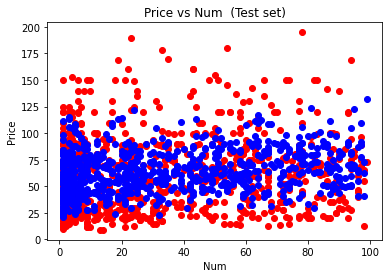

In [32]:
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], rf.predict(X_test), 'bo')
plt.title('Price vs Num  (Test set)')
plt.xlabel('Num')
plt.ylabel('Price')
plt.show()

In [33]:
#подведем итог: даже такие большие модели не помогают найти зависимости в прогнозировании в привычном пониманиии

In [34]:
#скорее всего, проблема именно в начальных данных и отстуствтие важного объясняющего параметра (вроде количества комнат)

In [ ]:
#возможно, нам стоит поменять направление в модели или даже ее спецификацию